## Demo of Noise as Target (NAT)

## I. Idea : 

- predict images from learnable noise

- learn representations by mapping data to to randomly sampled noise vectors.

- use random labels to train a network, then use the learned features to do other tasks [(Link1)](http://ruotianluo.github.io/2017/06/28/predict-noise/) [(Link2)](http://www.inference.vc/unsupervised-learning-by-predicting-noise-an-information-maximization-view-2/)

In [1]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

http://www.ipam.ucla.edu/programs/workshops/new-deep-learning-techniques/?tab=schedule

In [ ]:
from IPython.display import Image
Image(filename='./factorVAE.png',width=560,height=560)

### 1. Paper :


- Setting noise as pseudo target (NAT), we try to find good feature representation/discriminative features to map images to a predefined random vector and differentiate between the images. 


- Noise or pseudo target is sampled uniformly random latent vector from unit sphere which forces the network to learn features which can be distinguish the images. Given fixed k representations on unit hypersphere, CNN provide n feature representations which are close to chosen feature representations with k > n. 


- Picking the best assignment P from Hungarian algorithm from P(n, k) choices, we can update subset of assignments and CNN's parameter $\theta$'s.


### 2. Model


- consider a large set of images {$x_1$, . . . , $x_n$ }, where each image $x_i \in X$ has dimensions $3
\times w \times h$. 


- initialize a set of d-dimensional uniformly random latent vectors {$y_1$, . . . , $y_n$ }, where $y_i \in Y \subseteq  \mathbb{R}
^d$ for all i = 1, . . . n. 


- pair the dataset of images with the random vectors, obtaining the dataset {($y_1, x_1$), . . . ,($y_n , x_n$ )}. 


- jointly learn the parameters $\theta$ in $\Theta$ of a generator $f_\theta$ (convolutional network)  :
$X → Y$ and the optimal noise vector $y_i$ for each image $x_i$ 


- given a loss $l$, we try to solve the following optimization problem:


$$\min\limits_{\theta \in \Theta} {1 \over n} \sum^n\limits_{i=1} \min\limits_{y_i \in Y} l(f_\theta(x_i), y_i)$$

 $l : X \times X$ is a loss function measuring the mapping error from $f(x_i)$ to $y_i$
 
 <img src="./auto_encoder.png",width=360,height=360>
 
 
 - The model learns to map samples to learnable latent vectors z in a target dataset by minimizing a mapping loss. During the traning phase, optimizing the parameters of the discriminator and tuning the corresponding latent vectors are alternatively performed. 
 
 - it learns representations by mapping data to to randomly sampled noise vectors. 

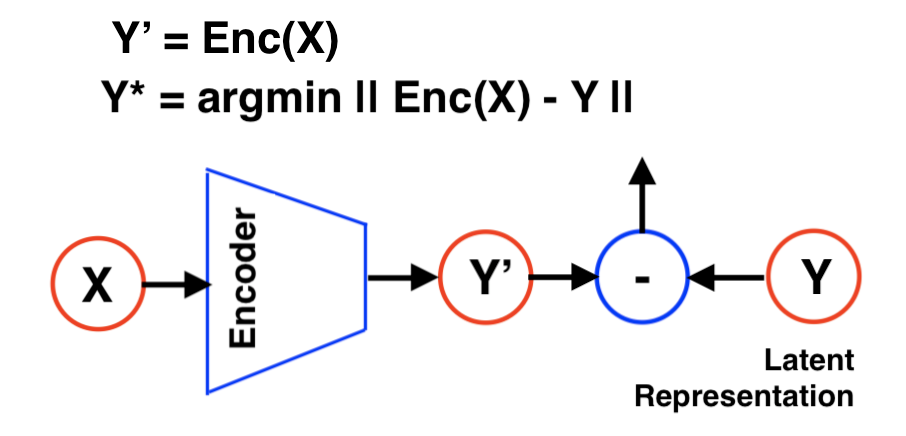

In [3]:
from IPython.display import Image
Image(filename='./auto_encoder.png',width=360,height=360)

##### Supervised learning:

suppose we have n samples $x_i$, and each sample has a target $y_i$(not limited to a class), we have to learn a function $f_\theta$, so that expected loss is minimized,

$$\min\limits_{\theta \in \Theta} {1 \over n} \sum^n\limits_{i=1} l(f_\theta(x_i), y_i)$$ 

#### Unsupervised learning

we do not have this target $y_i$, we have to learn the $y_i$. So the objective now becomes:


$$\min\limits_{\theta \in \Theta} {1 \over n} \min\limits_{y_i}  \sum^n\limits_{i=1} l(f_\theta(x_i), y_i)$$

To avoid all $y_is$ are constant, then $f_\theta$ outputs this constant all the time, we should put constraints on $y_i$.

 - choose k representations in advance (  k > n ; these k representations are fixed), 
 
 
 - then $y_i$ must be selected from the k representations, and the same representation can only be chosen by one $y_i$.
 

<img src="./nat1.png",width=560,height=560>

Denote in matrix form, 

 - target matrix $Y \in \mathbb{R}^{n \times d}$ (each line is $y_i \in \mathbb{R}^{d}$ and d is the length of y)
 (generate target representation on d-unit-sphere)
 
 
 - matrix $C \in \mathbb{R}^{k \times d}$ , containing pre-selected k representations. (each line is $c_j \in \mathbb{R}^{d}$ and d is the length of c) (restricting the representation to the unit sphere )


 - assignment matrix $P \in \mathbb{B}^{n \times k}$ , with values of {0,1}. 
     - If $P_{i,j}$ = 1, then $y_i = C_j$. for all i = 1, ...n and all j =1, ...k
     - P must satisfy that $P 1_k \leq 1_n$ , $P^T 1_n = 1_k$. (This is the mathematical form of the above selection constraint)


 -  Then Y can be represented by matrix factorization $$Y = PC$$
 
 
So the training objective becomes

$$\min\limits_{\theta \in \Theta}  \min\limits_{P \in \{0,1\}^{n \times k}} l_2(f_\theta(X), PC) = \min\limits_{\theta \in \Theta}  \min\limits_{P} ||f_\theta(X) -  PC||^2_F$$

- Loss: $l_2$ distance

- $f_\theta(x)$: outputs a unit vector of length d

- C: uniformly sampled from the unit sphere

In nutshell, this algorithm is finding a network that could map all the training data to a unit sphere uniformly.

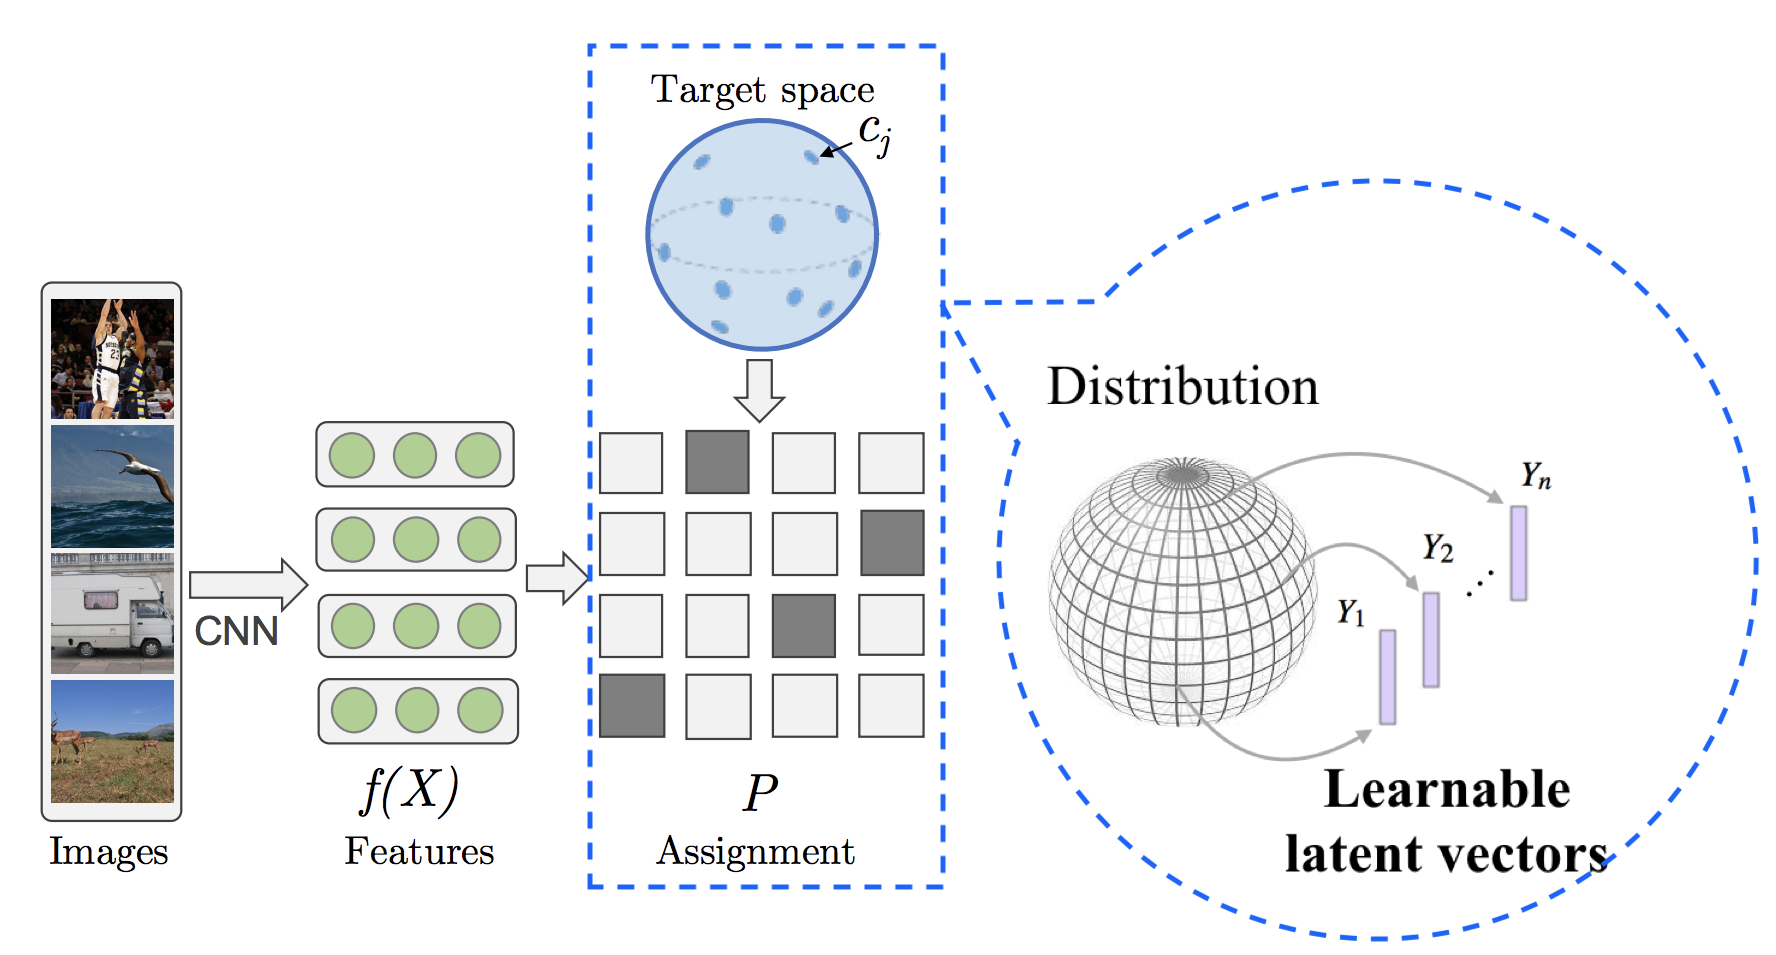

In [4]:
from IPython.display import Image
Image(filename='./nat1.png',width=860,height=860)

### 2. Re-interpret learning representations by maximising information [(link)](http://www.inference.vc/unsupervised-learning-by-predicting-noise-an-information-maximization-view-2/)


- Learn a compact representation of data $x_n$ drawn i.i.d. from some distribution $p(X)$.  

- The representation can be described as a random variable $z_n$ that is sampled conditionally i.i.d. from some parametric conditional distribution $p(Z|X,\theta)$:

$$x_n ∼ p(X)$$ 

$$z_n ∼ p(Z|X,\theta)$$

$$p(Z;θ) = \mathbb{E}_{x∼p_X} p(Z|X,\theta)$$

$$p(X,Z;\theta) = p(X)p(Z|X;\theta)$$

- In variational autoencoders, $p(Z|X,\theta)$ is called the encoder (or recognition model).  

-  there is at least a single representation $p(Z|X;\theta)$ which has the following two properties:

    - $z_n$ is a deterministic function of $x_n$ : $z_n = f (x_n, \theta)$
    
    - $p(Z;\theta)$ is the uniform distribution on the unit sphere (restricting the representation to the unit sphere  makes sense in the Infomax framework.)
    


#### Learning representations

 - The idea :  mapping between images and noise to learn generative models is a well known technique [Chen and Gopinath, 2000, Laparra et al., 2011, Sohl-Dickstein et al., 2015, Bordes et al., 2017].


- Zhang et al. [2016] realized the capability of deep neural networks to map large collections of images to
noise vectors


- Bojanowski and Joulin [2017] allow the noise vectors z to move in order to better learn the mapping from images to noise vectors. 


- The proposed GLO (Generative Latent Optimization) is the analogous to these works, in the opposite direction: learn a map from noise vectors to images. 






## II. Implementation

##### Dataset : 

- We focus on the MNIST, CIFAR-10, STL-10, CelebA, and LSUNBedroom datasets
- CIFAR-10 [Krizhevsky and Hinton, 2009] is set of images belonging to ten different object categories. We use the original training set, composed of 50,000 color images of size $32 \times 32$ pixels

<img src="./cifar-10.png",width=560,height=560>


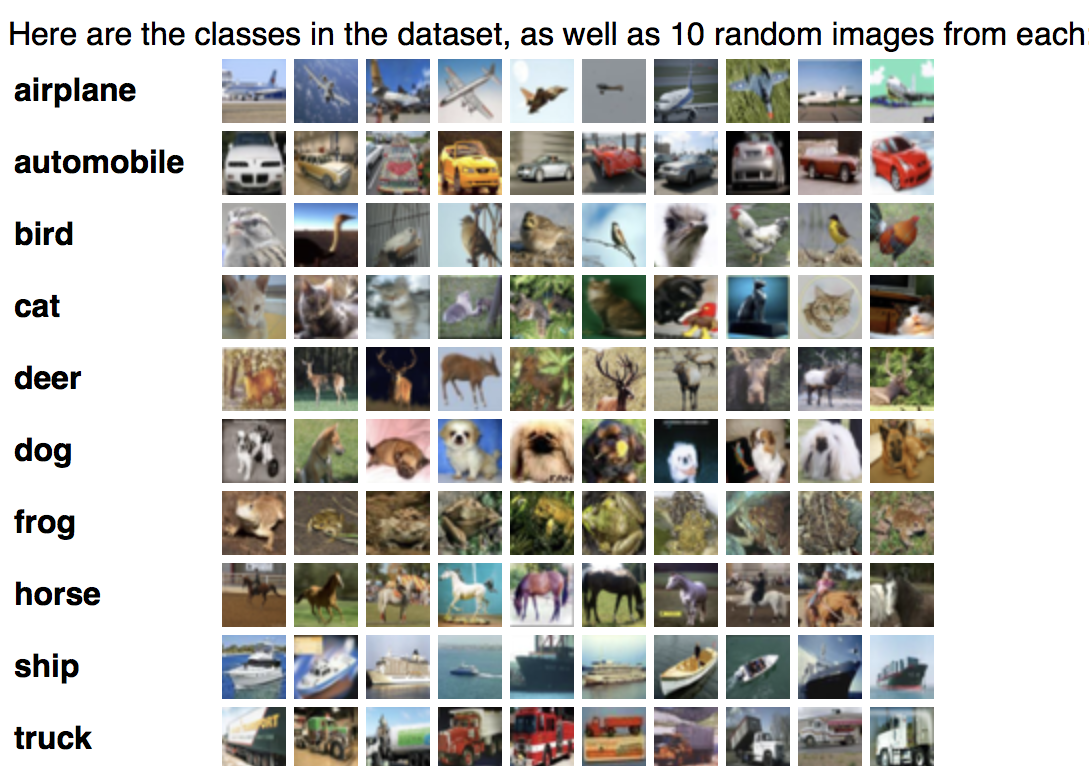

In [2]:
from IPython.display import Image
Image(filename='./cifar-10.png',width=560,height=560)

### 1. Load the CIFAR-10 dataset

In [5]:
import _pickle as pickle
import numpy as np
import os
from scipy.misc import imread

def load_CIFAR_batch(filename):
  """ load single batch of cifar """
  with open(filename, 'r') as f:
    datadict = pickle.load(f)
    X = datadict['data']
    Y = datadict['labels']
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
    Y = np.array(Y)
    return X, Y

def load_CIFAR10(data_dir):
    """ load all of cifar """
    print('Loading cifar10...')
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(data_dir, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)    
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(data_dir, 'test_batch'))
    return Xtr, Ytr, Xte, Yte

### 2. Generate target matrix Y (latent representation) 

The [Marsaglia-Bray](http://www.doc.ic.ac.uk/~wl/papers/07/csur07dt.pdf) algorithm is the polar method for generating normal variables

In [6]:
def generateTargetReps(n, z):
    """
    Generate a matrix of random target assignment.
    Each target assignment vector has unit length (hence can be view as random point on hypersphere)
    :param n: the number of samples to generate.
    :param z: the latent space dimensionality
    :return: the sampled representations
    """
    # Use Marsaglias algorithm to generate targets on z-unit-sphere
    # Generate target matrix Y 
    
    # Generate random targets using gaussian distrib.
    samples = np.random.normal(0, 1, [n, z]).astype(np.float32)
    
    # rescale such that fit on unit sphere.
    radiuses = np.expand_dims(np.sqrt(np.sum(np.square(samples),axis=1)),1)
    
    # return rescaled targets
    reps = samples/radiuses
    return reps

x = np.array([1,2])
print(x)
print(x.shape, '\n')

y = np.expand_dims(x, axis=0)
print(y)
print(y.shape, '\n')

z = np.expand_dims(x, axis=1)
print(z)
print(z.shape, '\n')

samples = np.random.normal(0, 1, [10, 4]).astype(np.float32)
radiuses = np.expand_dims(np.sqrt(np.sum(np.square(samples),axis=1)),1)
print(samples, '\n')

print(np.square(samples), '\n')
print(np.sum(np.square(samples),axis=1), '\n')
print(np.sqrt(np.sum(np.square(samples),axis=1)), '\n')
print(np.expand_dims(np.sqrt(np.sum(np.square(samples),axis=1)),1), '\n')
print(samples/radiuses)

### 3. Optimize Assignment with Hungarian Algorithm


The method used is the Hungarian algorithm, also known as the Munkres or Kuhn-Munkres algorithm. [(scipy.optimize.linear_sum_assignment)](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.optimize.linear_sum_assignment.html)

In [7]:
def calc_optimal_target_permutation(feat_reps, targets):
    """
    Compute the new target assignment that minimizes the SSE between the mini-batch feature space and the targets.

    :param feat_reps: the learnt feature representations (given some input images)
    :param targets: the currently assigned targets.
    :return: the targets reassigned such that the SSE between feature representations and targets is minimized for the batch.
    """
    
    # Optimize Assignment with Hungarian Algorithm
    
    # Compute cost matrix
    cost_matrix = np.zeros([feat_reps.shape[0],targets.shape[0]])
    
    # Calculate SSE between all features and targets
    for i in range(feat_reps.shape[0]):
        cost_matrix[:,i] = np.sum(np.square(feat_reps-targets[i,:]),axis=1)

    _, col_ind = scipy.optimize.linear_sum_assignment(cost_matrix)
    
    # Permute the targets based on hungarian algorithm optimization
    targets[range(feat_reps.shape[0])] = targets[col_ind]
    return targets

### Shuffle data

In [8]:
def shuffle_data(array1, array2):
    assert(array1.shape[0]==array2.shape[0])
    randomize = np.arange(array1.shape[0])
    np.random.shuffle(randomize)
    array1 = array1[randomize]
    array2 = array2[randomize]
    return array1, array2

import numpy as np
a = np.array([23, 12, 53, 232, 414 , 54 , 313,  131])
a.shape[0]
randomize = np.arange(a.shape[0])
print(randomize)
np.random.shuffle(randomize)
print(randomize)
print(a)
print(a[randomize])

### Utilities

In [9]:
def merge(images, size):
    h, w = images.shape[1], images.shape[2]
    print(images.shape)
    img = np.zeros((h * size[0], w * size[1], 3))
    for idx, image in enumerate(images[0:size[0]*size[1], :, :, :]):
        i = idx % size[1]
        j = idx // size[1]
        img[j*h:j*h+h, i*w:i*w+w, :] = image
    return img


def inverse_transform(images):
    return (images+1.)/2.

def imsave(images, size, path):
    arr = merge(images, size)
    print(arr.shape)
    return misc.imsave(path,arr)

def save_images(images, size, image_path):
    return imsave(inverse_transform(images), size, image_path)

### 4. Algorithm


- The algorithm is kind of similar to k-means. First, given current parameters, find new assignment P, and then fix the new assignment to optimize $\theta$.

- Due to the size of data, they use the SGD method. For the assignment, they only update the sub-matrix of the current batch, that is, the change of assignments can only occur inside the batch

<img src="./algo.png",width=400,height=400>

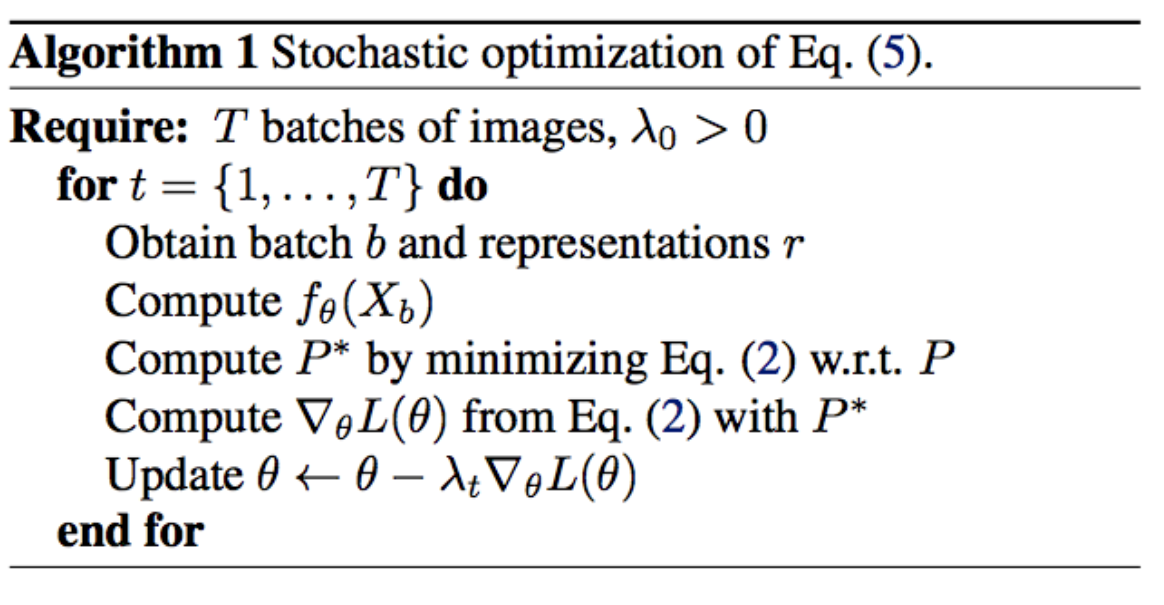

In [10]:
from IPython.display import Image
Image(filename="./algo.png",width=400,height=400)

[tf.reset_default_graph() ](https://github.com/kratzert/finetune_alexnet_with_tensorflow/issues/8)

### a. Pretrain the cnn using this algorithm

- CNN network structure : alexnet

- Preprocess(to avoid trivial clustering by color) :

    - gray scale image gradient. 
    
    - data augmentation methods like flip, crop.

- Fix the CNN, and fine tune on image classification and detection tasks.

In [11]:
import model
import numpy as np
import tensorflow as tf
import timeit
import utils
np.random.seed(3333)


params = dict(batch_size=256,
              model_dir='./natenc-cifar10-allclass',
              data_dir='./cifar-10-batches-py',
              input_type='cifar10',
              use_grayscale=False,
              use_gradient_images=False,
              augment_mlp_training=False,
              lr=0.0001,
              mlp_lr=0.001,
              lr_update_step=10000,
              decay_steps=2,
              num_epochs=20,
              output_every=100,
              train_mlp_every=10,
              mlp_epochs=50,
              z_dim=32,
              num_classes=10)


# Load cifar
data_train, labels_train, data_test, labels_test = utils.load_cifar_XandY(params['data_dir'])

# Train data
data_train_prep = data_train
data_train_mlp = data_train

# Test data
data_test_prep = data_test

# Target reps
targetReps = utils.generateTargetReps(data_train.shape[0], params['z_dim']) # z_dim = d

# Clears the default graph stack and resets the global default graph
tf.reset_default_graph() 

# setup Model
nat_enc = model.NATEnc(params)

# MLP reset op
mlp_reset_op = tf.variables_initializer(nat_enc.mlp_vars)

Loading cifar10...
Done.


In [12]:
# Train data
print(data_train_prep.shape)
print(data_train_mlp.shape)
print(data_test_prep .shape)
print(targetReps.shape)
print(mlp_reset_op)

(50000, 32, 32, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 32)
name: "init"
op: "NoOp"
input: "^mlp_step/Assign"
input: "^mlp/fully_connected/weights/Assign"
input: "^mlp/fully_connected/biases/Assign"
input: "^mlp/fully_connected_1/weights/Assign"
input: "^mlp/fully_connected_1/biases/Assign"
input: "^mlp/fully_connected_2/weights/Assign"
input: "^mlp/fully_connected_2/biases/Assign"



In [13]:
print(nat_enc.mlp_summary_op)
print(nat_enc.summary_op)

Tensor("Merge_1/MergeSummary:0", shape=(), dtype=string)
Tensor("Merge/MergeSummary:0", shape=(), dtype=string)


In [14]:
#tf.Graph().as_default()
saver = tf.train.Saver()
summary_writer = tf.summary.FileWriter(params['model_dir'])
sv = tf.train.Supervisor(logdir=params['model_dir'],
                        is_chief=True,
                        saver=saver,
                        summary_op=None,
                        summary_writer=summary_writer,
                        save_model_secs=300,
                        global_step=nat_enc.step,
                        ready_for_local_init_op=None)

gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(allow_soft_placement=True,
                            gpu_options=gpu_options)
lr = params['lr']
# set up the TF session and init all ops and variables
with sv.prepare_or_wait_for_session(config=sess_config) as sess:

    batches_per_epoch = data_train_prep.shape[0] / params['batch_size']
    batches_per_epoch = int(batches_per_epoch)
    counter = 0
    curr_epoch = -1
    batch_timings = []
    decay_steps = 0
    for counter in range(params['num_epochs'] * batches_per_epoch):
        if counter % batches_per_epoch == 0:
            # New epoch
            batch_idx = 0
            curr_epoch += 1
            # Randomize order
            targetReps, data_train_prep = utils.shuffle_together(targetReps, data_train_prep)

        beg_t = timeit.default_timer()
        # Get a batch of samples from training data
        batch_x_real = data_train_prep[batch_idx:(batch_idx + params['batch_size'])]
        batch_target = targetReps[batch_idx:(batch_idx + params['batch_size'])]
        if (curr_epoch +1) % 3 == 0:
            # Get Current Representations
            feed_dict = {nat_enc.input_train_ph: batch_x_real,nat_enc.dropout_keep_prob:1.0}
            fetch_dict = {
                    "reps": nat_enc.representation
                }
            result = sess.run(fetch_dict,feed_dict=feed_dict)

            # Optimize Assignment with Hungarian Algorithm
            batch_target = utils.calc_optimal_target_permutation(result['reps'], batch_target)
            targetReps[batch_idx:(batch_idx + params['batch_size'])] = batch_target

        # Optimize Network Weights
        feed_dict = {nat_enc.targets: batch_target, nat_enc.input_train_ph: batch_x_real,nat_enc.dropout_keep_prob:0.5}

        fetch_dict = {
                "train": nat_enc.train_op
            }
        if counter % params['output_every'] == 0 and counter!= 0:
            fetch_dict.update({
                "summary": nat_enc.summary_op,
                "loss": nat_enc.loss
            })
        result = sess.run(fetch_dict,feed_dict=feed_dict)


        end_t = timeit.default_timer()
        batch_timings.append(end_t - beg_t)
        if counter % params['output_every'] == 0 and counter!= 0:
            loss = result['loss']
            print("Epoch {}, Step [{}/{}] Loss: {:.6f}". \
                      format(curr_epoch, counter%batches_per_epoch, batches_per_epoch, loss))


            summary_writer.add_summary(result['summary'], counter)
            summary_writer.flush()

        if counter % params['lr_update_step'] == params['lr_update_step'] - 1 and decay_steps<params['decay_steps']:
            lr = lr*0.5
            decay_steps+=1
            sess.run([nat_enc.lr_update],feed_dict={nat_enc.new_lr: lr})

        # Train mlp
        if curr_epoch % params['train_mlp_every'] == 0 and counter % batches_per_epoch == 0:
            # Reset MLP
            sess.run(mlp_reset_op)
            # Compute Representations
            batches_per_epoch = data_train_mlp.shape[0] / params['batch_size']
            batches_per_epoch = int(batches_per_epoch)
            
            mlp_batch_idx = 0
            # randomize order
            labels_train, data_train_mlp = utils.shuffle_together(labels_train, data_train_mlp)

            x_train_mlp = data_train_mlp[:batches_per_epoch*params['batch_size']]
            y_train = labels_train[:batches_per_epoch*params['batch_size']]

            computed_reps = []
            if not params['augment_mlp_training']:
                for mlp_step in range(batches_per_epoch):
                    batch_x_real = x_train_mlp[mlp_step*params['batch_size']:(mlp_step+1)*params['batch_size']]
                    reps = sess.run(nat_enc.representation,
                             feed_dict={nat_enc.input_train_ph:batch_x_real,nat_enc.dropout_keep_prob:1.0})
                    computed_reps.append(reps)
                computed_reps = np.concatenate(computed_reps,axis=0)

            for mlp_step in range(params['mlp_epochs']*batches_per_epoch):
                if counter % batches_per_epoch == 0:
                    # epoch change. First time this if is true, so also init variables.
                    mlp_batch_idx = 0
                    if params['augment_mlp_training']:
                        y_train, x_train_mlp = utils.shuffle_together(y_train, x_train_mlp)
                    else:
                        y_train, computed_reps = utils.shuffle_together(y_train, computed_reps)

                batch_label = y_train[mlp_batch_idx:(mlp_batch_idx + params['batch_size'])]
                if params['augment_mlp_training']:
                    batch_x = x_train_mlp[mlp_batch_idx:(mlp_batch_idx + params['batch_size'])]
                    _, loss, top_k, step = sess.run([nat_enc.mlp_train_op,nat_enc.mlp_loss, nat_enc.mlp_top_k_from_ph, nat_enc.mlp_step],
                         feed_dict={nat_enc.mlp_labels:batch_label, nat_enc.input_train_ph:batch_x, nat_enc.dropout_keep_prob:1.0})
                else:
                    batch_reps = computed_reps[mlp_batch_idx:(mlp_batch_idx + params['batch_size'])]
                    _, loss, top_k, step = sess.run([nat_enc.mlp_train_op,nat_enc.mlp_loss, nat_enc.mlp_top_k_from_ph, nat_enc.mlp_step],
                         feed_dict={nat_enc.mlp_labels:batch_label, nat_enc.representation_ph:batch_reps})
                top_k = np.sum(top_k)

                if mlp_step % batches_per_epoch == batches_per_epoch -1:
                    print("MLP Training Epoch {} finished, Loss: {:.6f}, Accuracy: {:.6f}". \
                              format(mlp_step/batches_per_epoch, loss, float(top_k)/params['batch_size']))
                    tag = 'mlp_train_epoch'+str(curr_epoch)
                    train_summary = tf.Summary(value=[tf.Summary.Value(tag=tag+"/loss", simple_value=loss),
                                             tf.Summary.Value(tag=tag+"/train_accuracy", simple_value=float(top_k)/params['batch_size']),
                                       ])
                    summary_writer.add_summary(train_summary,step)
                    summary_writer.flush()

                mlp_batch_idx += params['batch_size']
                if (mlp_step/batches_per_epoch)%5 == 0 and mlp_step % batches_per_epoch == 0:
                    # Test trained MLP
                    labels_test, data_test_prep = utils.shuffle_together(labels_test, data_test_prep)
                    batches = data_test_prep.shape[0] / params['batch_size']
                    batches = int(batches)
                    
                    correct_pred = 0
                    mlp_batch_idx = 0
                    for _ in range(batches):
                        batch_x_test = data_test_prep[mlp_batch_idx:(mlp_batch_idx + params['batch_size'])]
                        batch_label = labels_test[mlp_batch_idx:(mlp_batch_idx + params['batch_size'])]
                        top_k = sess.run(nat_enc.mlp_top_k,feed_dict={nat_enc.input_test_ph:batch_x_test, nat_enc.mlp_labels:batch_label,nat_enc.dropout_keep_prob:1.0})
                        top_k = np.sum(top_k)
                        correct_pred += top_k
                        mlp_batch_idx += params['batch_size']

                    accuracy = float(correct_pred)/mlp_batch_idx
                    print("MLP test accuracy: {:.6f}".format(accuracy))
                    tag = 'mlp_train_epoch'+str(curr_epoch)
                    test_summary = tf.Summary(value=[tf.Summary.Value(tag=tag+"/test_accuracy", simple_value=accuracy)])
                    summary_writer.add_summary(test_summary,step)
                    summary_writer.flush()


        counter += 1
        batch_idx += params['batch_size']

    print("Done training for {} epochs! Elapsed time: {}s".format(params['num_epochs'], np.sum(batch_timings)))
    print("Total amount of iterations done: ", counter)

INFO:tensorflow:Restoring parameters from ./natenc-cifar10-allclass/model.ckpt-12939
INFO:tensorflow:Starting standard services.
INFO:tensorflow:Saving checkpoint to path ./natenc-cifar10-allclass/model.ckpt
INFO:tensorflow:Starting queue runners.
INFO:tensorflow:step/sec: 0
INFO:tensorflow:step/sec: 0.00833321
INFO:tensorflow:step/sec: 0
INFO:tensorflow:Saving checkpoint to path ./natenc-cifar10-allclass/model.ckpt
INFO:tensorflow:step/sec: 0
INFO:tensorflow:step/sec: 0
MLP test accuracy: 0.086538
MLP Training Epoch 0.9948717948717949 finished, Loss: 1.876657, Accuracy: 0.335938
MLP Training Epoch 1.994871794871795 finished, Loss: 1.820029, Accuracy: 0.371094
MLP Training Epoch 2.994871794871795 finished, Loss: 1.673423, Accuracy: 0.421875
MLP Training Epoch 3.994871794871795 finished, Loss: 1.590912, Accuracy: 0.433594
MLP Training Epoch 4.994871794871795 finished, Loss: 1.618249, Accuracy: 0.417969
MLP test accuracy: 0.415966
MLP Training Epoch 5.994871794871795 finished, Loss: 1.56

### b. Nearest Neighbor Search:

###### Select 6 query images and the result will return their 5 nearest neighbors in CIFAR-10 

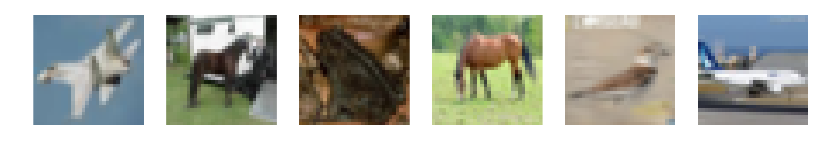

In [35]:
import matplotlib.pyplot as plt


samples = [10,20,30,60,70,90]
images = []

for counter,sample in enumerate(samples):
    images.append(np.expand_dims(data_test[sample],axis=0))

    
#Visualizing CIFAR 10
fig, axes = plt.subplots(1,6,figsize=(10,10))
for idx, a in enumerate(axes):
    #i = np.random.choice(range(len(images)))
    a.set_axis_off()
    a.imshow(images[idx][0], interpolation='none')
    
#fig.show()
fig

In [ ]:
np.random.seed(3333)

params = dict(batch_size=32,
              model_dir='./natenc-cifar10-allclass',
              data_dir='./cifar-10-batches-py',
              out_path='./neighbors_1.png',
              input_type='cifar10',
              lr=0.0,
              mlp_lr=0.0,
              use_grayscale=False,
              use_gradient_images=False,
              augment_mlp_training=False,
              z_dim=32,
              num_classes=10)

num_tests = 1
samples = [10,20,30,60,70,90]
number_of_neighbors = 5

test_batch_size = params['batch_size']

# load cifar10
data_train, labels_train, data_test, labels_test = utils.load_cifar_XandY(params['data_dir'])

data_test_prep = data_test

# Setup model
nat_enc = model.NATEnc(params)
tf.global_variables_initializer().run()

In [ ]:
summary_writer = tf.summary.FileWriter(params['model_dir'])
sv = tf.train.Supervisor(logdir=params['model_dir'], summary_writer=None)

gpu_options = tf.GPUOptions(allow_growth=True)
sess_config = tf.ConfigProto(allow_soft_placement=True,
                            gpu_options=gpu_options)

# set up the TF session and init all ops and variables
with sv.prepare_or_wait_for_session(config=sess_config) as sess:
    cycles = data_test_prep.shape[0]/test_batch_size
    results = []
    for i in range(cycles):
        feed_dict = {nat_enc.input_test_ph: data_test_prep[i*test_batch_size:(i+1)*test_batch_size],
                     nat_enc.dropout_keep_prob:1.0}
        fetch_dict = {
                "reps": nat_enc.representation_test,
            }
        res_test = sess.run(fetch_dict,feed_dict=feed_dict)
        results.append(res_test['reps'])
    r = np.concatenate(results,axis=0)
    images = []
    for counter,sample in enumerate(samples):
        images.append(np.expand_dims(data_test[sample],axis=0))
        img_without = np.concatenate([data_test[:sample,:],data_test[sample+1:,:]],axis=0)
        r_without = np.concatenate([r[:sample,:],r[sample+1:,:]],axis=0)
        for i in range(number_of_neighbors):
            nearest_index = np.sum(np.square(r_without-r[sample]),axis=1).argmin()
            images.append(np.expand_dims(img_without[nearest_index],axis=0))
            img_without = np.concatenate([img_without[:nearest_index,:],img_without[nearest_index+1:,:]],axis=0)
            r_without = np.concatenate([r_without[:nearest_index,:],r_without[nearest_index+1:,:]],axis=0)

    printimages = np.concatenate(images,axis=0)
    utils.save_images(printimages,[len(samples),number_of_neighbors+1],params['out_path'])

<img src="./neighbors1.png",width=360,height=360>

##### The query images are shown on the left column, and the nearest neighbors are sorted from the closer to the further (left to right)

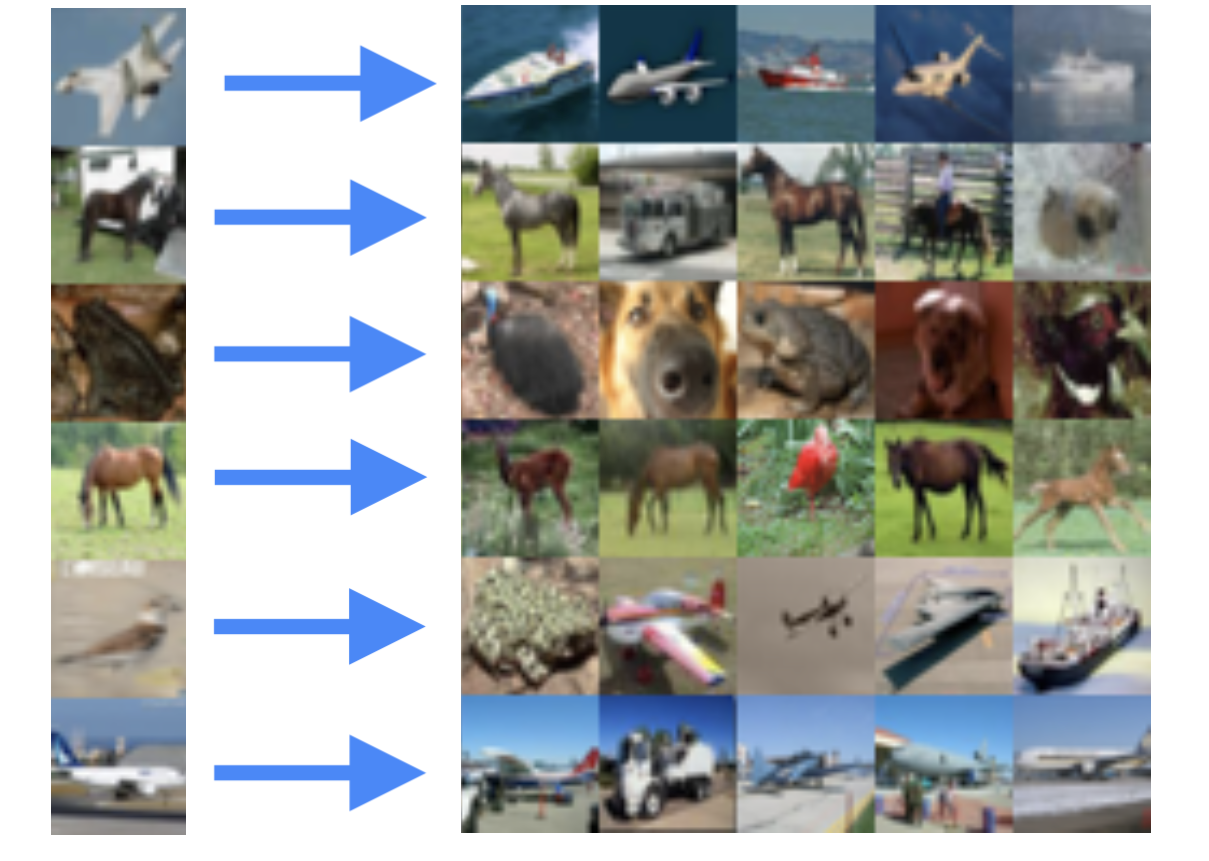

In [38]:
from IPython.display import Image
Image(filename="./neighbors1.png",width=600,height=600)

https://www.quora.com/What-is-Least-Angle-Regression-and-when-should-it-be-used

https://towardsdatascience.com/deep-inside-autoencoders-7e41f319999f

http://ruotianluo.github.io/2017/06/28/predict-noise/

http://www.inference.vc/unsupervised-learning-by-predicting-noise-an-information-maximization-view-2/

In [ ]:
graphdef = tf.get_default_graph().as_graph_def()
nodes = iter(graphdef.node)
print(next(nodes))